11490434/11490434 [==============================] - 1s 0us/step


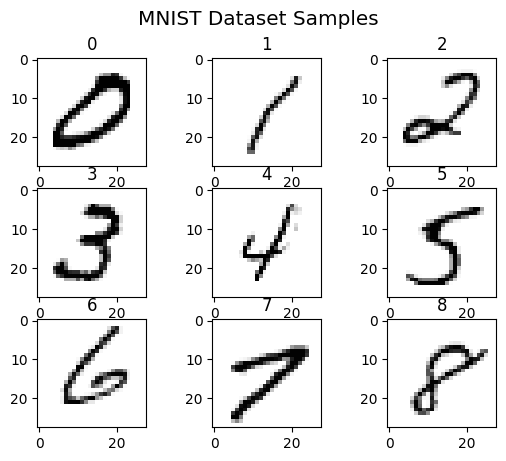

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.figure()
plt.suptitle("MNIST Dataset Samples", fontsize = 'x-large')
label_indexes = { y_train[i]: i for i in range(len(y_train)) }

for i in range(9):
    index = label_indexes[i]
    plt.subplot(3, 3,i+1)
    plt.title(y_train[index])
    plt.imshow(X_train[index],cmap="Greys")


In [3]:

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Reshape your data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Model definition
model = Sequential()
model.add(Conv2D(64, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(32, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [5]:
h = model.fit(X_train, y_train,
                    batch_size=60,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
1000/1000 [==============================] - 147s 146ms/step - loss: 0.3232 - accuracy: 0.8980 - val_loss: 0.0815 - val_accuracy: 0.9761
Epoch 2/10
1000/1000 [==============================] - 98s 98ms/step - loss: 0.1200 - accuracy: 0.9626 - val_loss: 0.0516 - val_accuracy: 0.9829
Epoch 3/10
1000/1000 [==============================] - 43s 43ms/step - loss: 0.0932 - accuracy: 0.9719 - val_loss: 0.0430 - val_accuracy: 0.9859
Epoch 4/10
1000/1000 [==============================] - 44s 44ms/step - loss: 0.0807 - accuracy: 0.9756 - val_loss: 0.0390 - val_accuracy: 0.9877
Epoch 5/10
1000/1000 [==============================] - 44s 44ms/step - loss: 0.0719 - accuracy: 0.9778 - val_loss: 0.0347 - val_accuracy: 0.9887
Epoch 6/10
1000/1000 [==============================] - 44s 44ms/step - loss: 0.0657 - accuracy: 0.9797 - val_loss: 0.0338 - val_accuracy: 0.9887
Epoch 7/10
1000/1000 [==============================] - 157s 157ms/step - loss: 0.0608 - accuracy: 0.9819 - val_loss: 0.03

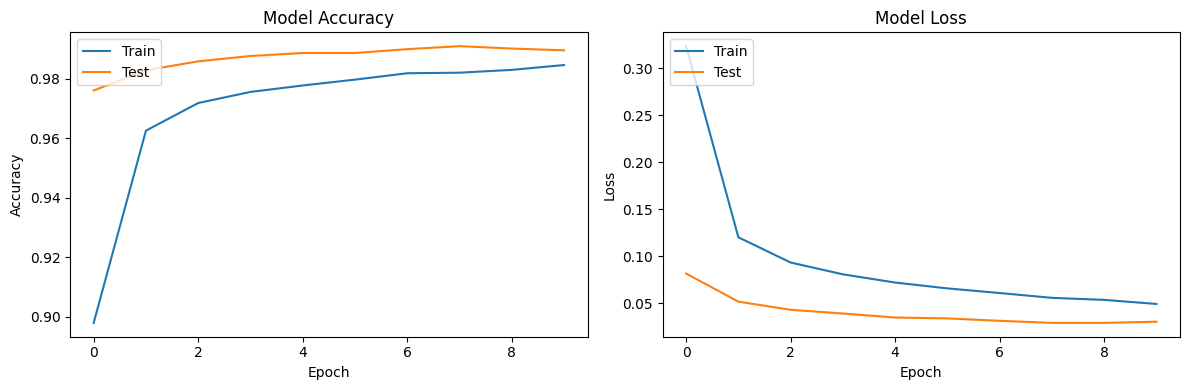

In [6]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


313/313 [==============================] - 2s 6ms/step


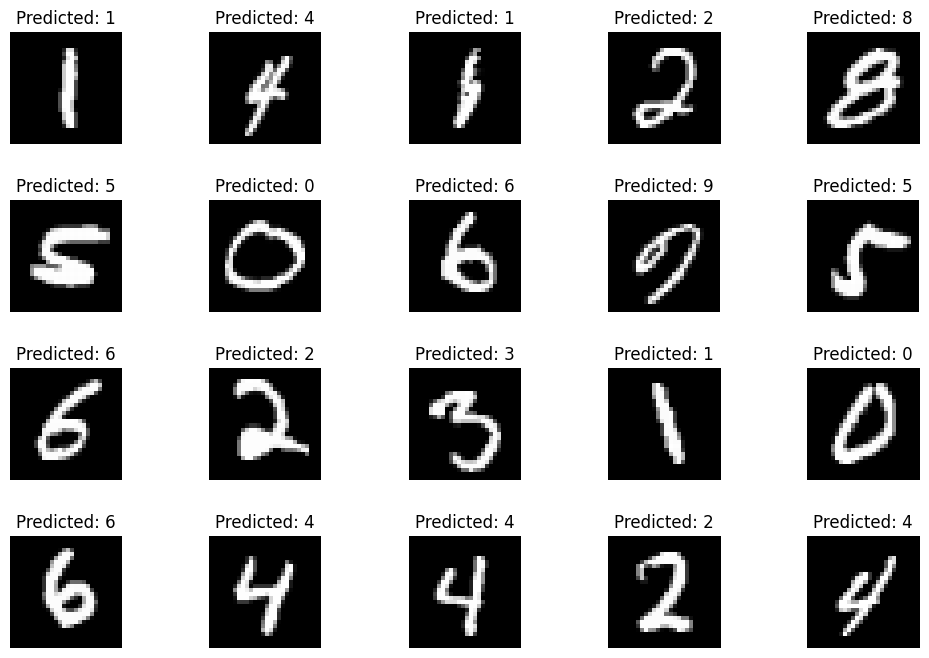

In [7]:
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(y_pred, axis=1)

# Select 20 test samples to display
num_samples_to_display = 20
selected_indices = np.random.randint(0, len(X_test), num_samples_to_display)

# Create subplots in rows of 5
num_rows = 4  # 20 samples in 4 rows of 5
fig, axes = plt.subplots(num_rows, 5, figsize=(12, 8))

for i, index in enumerate(selected_indices):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    ax.imshow(X_test[index].reshape(28, 28), cmap='gray')
    ax.set_title(f'Predicted: {predicted_labels[index]}')
    ax.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


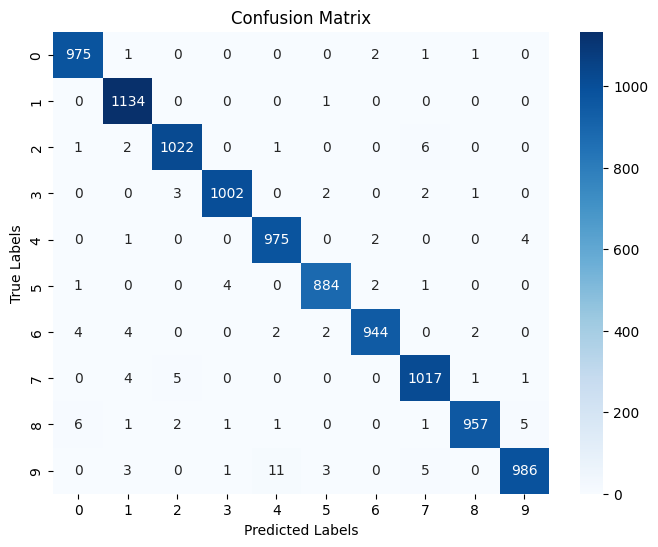

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)])

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [23]:
import pandas as pd

# Create a DataFrame to store the results
results_df = pd.DataFrame({'True_Label': y_test.argmax(axis=1), 'Predicted_Label': predicted_labels})

# Save the results to a CSV file
results_df.to_csv('model_predictions.csv', index=False)